In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# chengede

In [3]:
def j_E(E, n, T):
    return n**2*T**(-0.5)*np.exp(-E/T)


In [4]:
Be6_data = np.loadtxt('Be6micm.txt')
Be12_data = np.loadtxt('Be12micm.txt')
Egrid = Be6_data[:,0]
Be6trans = Be6_data[:,1] 
Be12trans = Be12_data[:,1] 

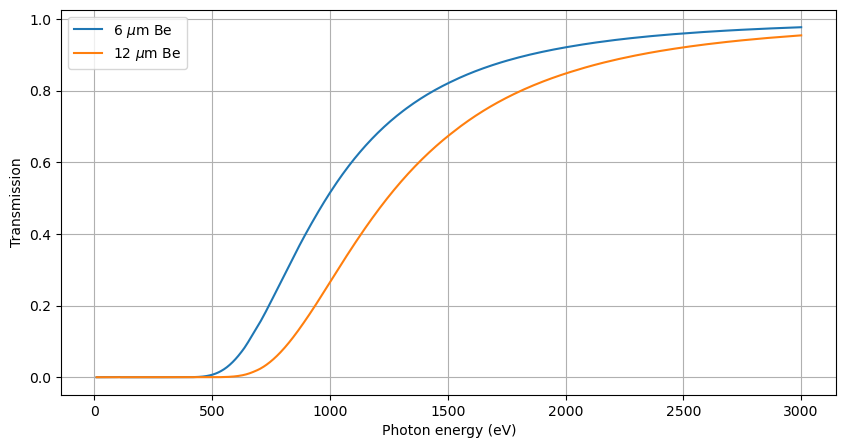

In [5]:
plt.figure(figsize=(10,5))
plt.plot(Egrid, Be6trans, label=r'6 $\mu$m Be')
plt.plot(Egrid, Be12trans, label=r'12 $\mu$m Be')
plt.grid()
plt.xlabel('Photon energy (eV)')
plt.ylabel('Transmission')
plt.legend()

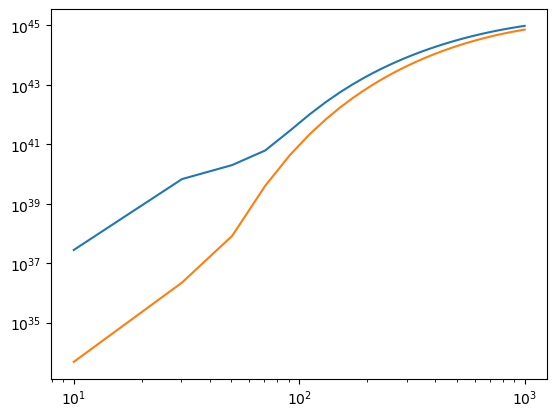

In [6]:
j1d = j_E(E=Egrid, n=1e22, T=20)
L = 1
I1d = L*j1d
n1 = 1e22

def Ni(Earray,T, Warray):

    if Earray.shape[0] != Warray.shape[0]:
        print('Error. Earray must have the same shape as Warray')

    jarray = j_E(E=Earray, n=n1, T=T)
    return np.trapz(jarray*Warray, Earray)

    

Tarray = np.linspace(10, 1000)
N6array = np.zeros_like(Tarray)
N12array = np.zeros_like(Tarray)

for i in range(Tarray.shape[0]):
    N6array[i] = Ni(Earray=Egrid, T=Tarray[i], Warray=Be6trans)
    N12array[i] = Ni(Earray=Egrid, T=Tarray[i], Warray=Be12trans)
plt.loglog(Tarray, N6array)
plt.loglog(Tarray, N12array)



    


Text(0, 0.5, 'log Ratio R = N12/N6')

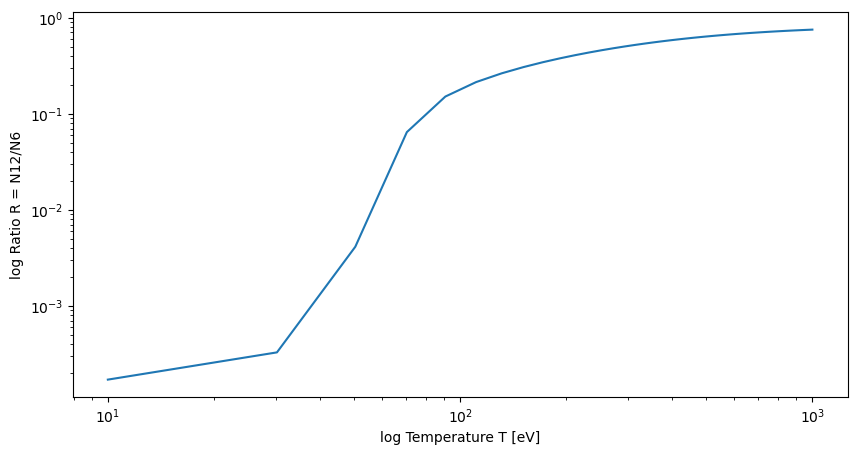

In [7]:
plt.figure(figsize=(10,5))
plt.loglog(Tarray, N12array/N6array)
plt.xlabel('log Temperature T [eV]')
plt.ylabel('log Ratio R = N12/N6')

[2.79549193e+37 1.60008183e+42 3.41030292e+43 1.22268159e+44
 2.51570925e+44 4.01108535e+44 5.55093280e+44 7.03782125e+44
 8.41999628e+44 9.67513283e+44]
[  10.  120.  230.  340.  450.  560.  670.  780.  890. 1000.]


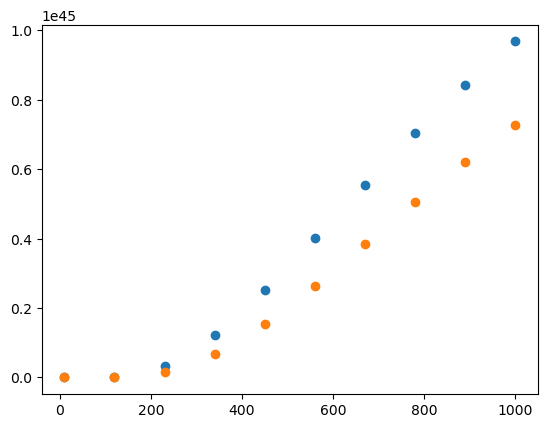

In [8]:
Tarray2 = np.linspace(10, 1000, 10)
N6array2 = np.zeros_like(Tarray2)
N12array2 = np.zeros_like(Tarray2)

for i in range(Tarray2.shape[0]):
    N6array2[i] = Ni(Earray=Egrid, T=Tarray2[i], Warray=Be6trans)
    N12array2[i] = Ni(Earray=Egrid, T=Tarray2[i], Warray=Be12trans)
print(N6array2)
print(Tarray2)
plt.scatter(Tarray2, N6array2)
plt.scatter(Tarray2, N12array2)

Text(0, 0.5, 'log Ratio R = N12/N6')

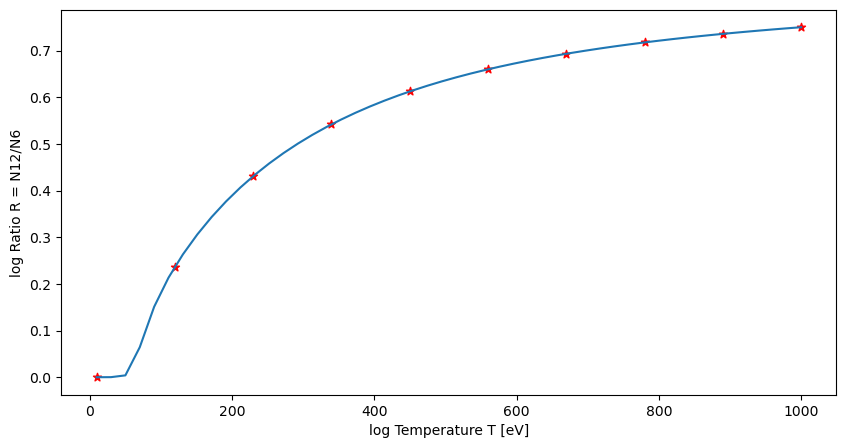

In [9]:
plt.figure(figsize=(10,5))
plt.plot(Tarray, N12array/N6array)
plt.scatter(Tarray2, N12array2/N6array2, marker='*', color='red')
plt.xlabel('log Temperature T [eV]')
plt.ylabel('log Ratio R = N12/N6')

Text(0, 0.5, 'Temperature')

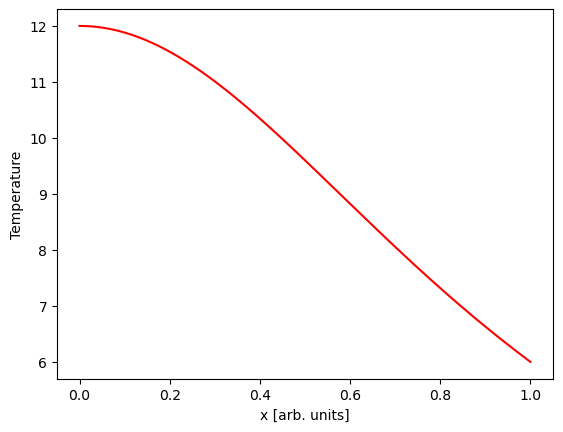

In [13]:
a = 1
n0 = 1e22
T0 = 12

def nx(x, n0):
    return n0*(1 + x**2/a**2)

def Tx(x, T0):
    return T0/(1 + x**2/a**2)

xarray = np.linspace(0, a, 1000)
narrayx = nx(xarray, n0)
Tarrayx = Tx(xarray, T0)

plt.plot(xarray, Tarrayx, color='red')
plt.xlabel('x [arb. units]')
plt.ylabel('Temperature')


Text(0, 0.5, 'Density')

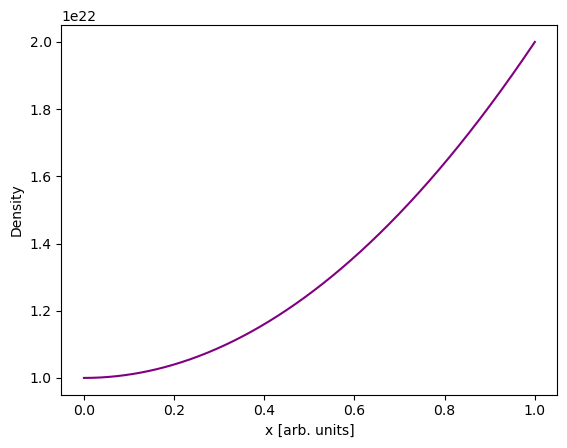

In [14]:
plt.plot(xarray, narrayx, color='purple')
plt.xlabel('x [arb. units]')
plt.ylabel('Density')

(10, 1001)


Text(0, 0.5, 'I(E) = integral(j(x, E, T0))')

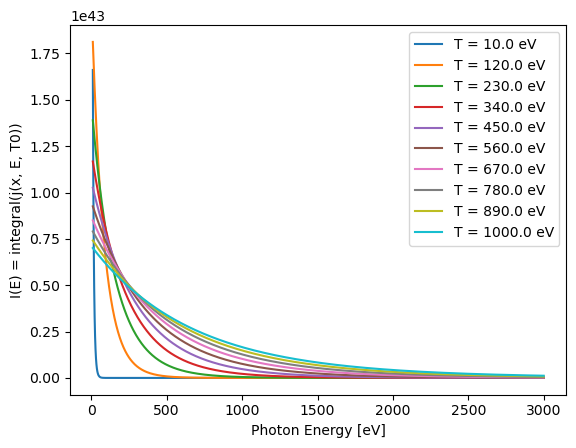

In [36]:
a = 1
n0 = 1e22
T0 = 12
def j_E(E, n, T):
    return n**2*T**(-0.5)*np.exp(-E/T)

def IE(xarray, E, T0, n0):
    jx = j_E(E, nx(xarray, n0=n0), Tx(xarray, T0=T0))
    return np.trapz(jx, xarray)



IEarray = np.zeros((Tarray2.shape[0], Egrid.shape[0]))
for i in range(Tarray2.shape[0]):
    Ti = Tarray2[i]
    for j in range(Egrid.shape[0]):
        IEarray[i, j] = IE(xarray, E=Egrid[j], T0=Ti, n0=1e22)

print(IEarray.shape)
for i in range(Tarray2.shape[0]):
    T = Tarray2[i]
    plt.plot(Egrid, IEarray[i, :], label='T = ' + str(T) + ' eV')

plt.legend()
plt.xlabel('Photon Energy [eV]')
plt.ylabel('I(E) = integral(j(x, E, T0))')



1.0141543898720614e+37


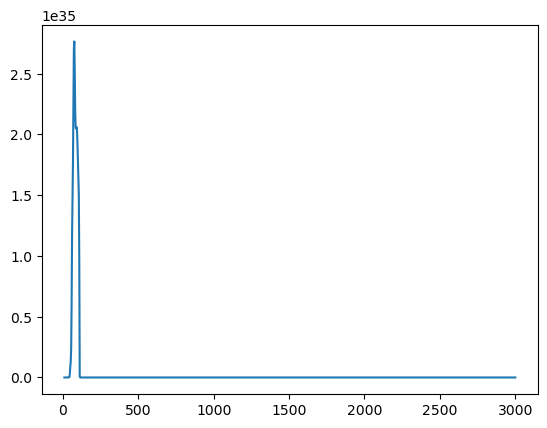

In [52]:
plt.plot(Egrid, Be6trans*IEarray[0,:])
print(np.trapz(Be6trans*IEarray[0,:], Egrid))

1.0141543898720614e+37


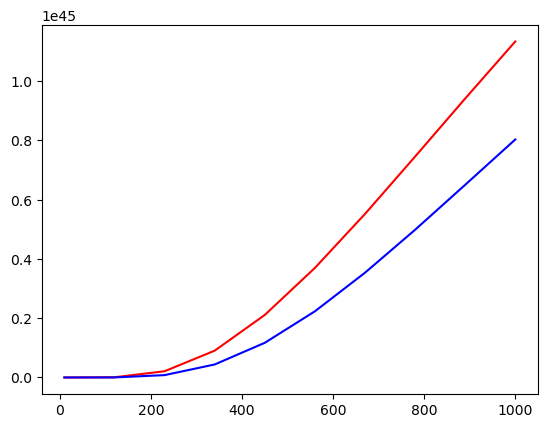

In [54]:
N6arrayx = np.zeros_like(Tarray2)
N12arrayx = np.zeros_like(Tarray2)
for iT in range(IEarray.shape[0]):
    IE_T = IEarray[iT, :]
    #print(IE_T.shape)
    N6arrayx[iT] = np.trapz(IE_T*Be6trans, Egrid)
    N12arrayx[iT] = np.trapz(IE_T*Be12trans, Egrid)

plt.plot(Tarray2, N6arrayx, color='red')
plt.plot(Tarray2, N12arrayx, color='blue')
# plt.scatter(Tarray2, N6arrayx)
# plt.scatter(Tarray2, N12arrayx)
print(N6arrayx[0])

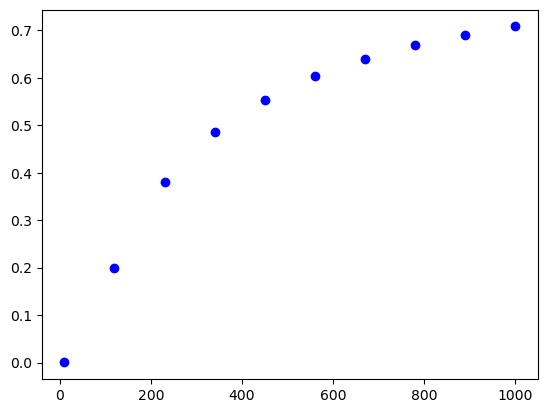

In [56]:
# now, plot their ratio 

plt.scatter(Tarray2, N12arrayx/N6arrayx, color='blue')

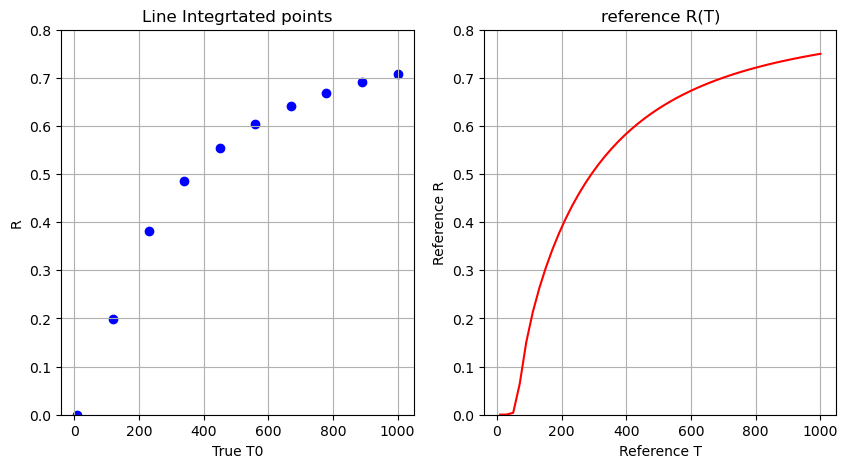

In [65]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].scatter(Tarray2, N12arrayx/N6arrayx, color='blue')
axs[0].set_title('Line Integrtated points')
axs[0].set_xlabel('True T0')
axs[0].set_ylabel('R')
axs[0].set_ylim((0, 0.8))
axs[0].grid()

axs[1].plot(Tarray, N12array/N6array, color='red')
axs[1].set_title('reference R(T)')
axs[1].set_xlabel('Reference T')
axs[1].set_ylabel('Reference R')
axs[1].set_ylim((0, 0.8))
axs[1].grid()

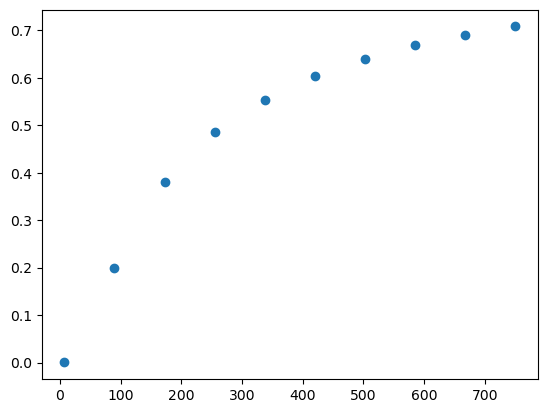

In [67]:
Tdav = np.zeros_like(Tarray2)

narrayx = nx(xarray, n0=n0)

for i in range(Tdav.shape[0]):
    T0 = Tarray2[i]
    Tdav[i] = np.trapz(narrayx*Tx(xarray, T0=T0), xarray) / np.trapz(narrayx, xarray)

plt.scatter(Tdav, N12arrayx/N6arrayx)

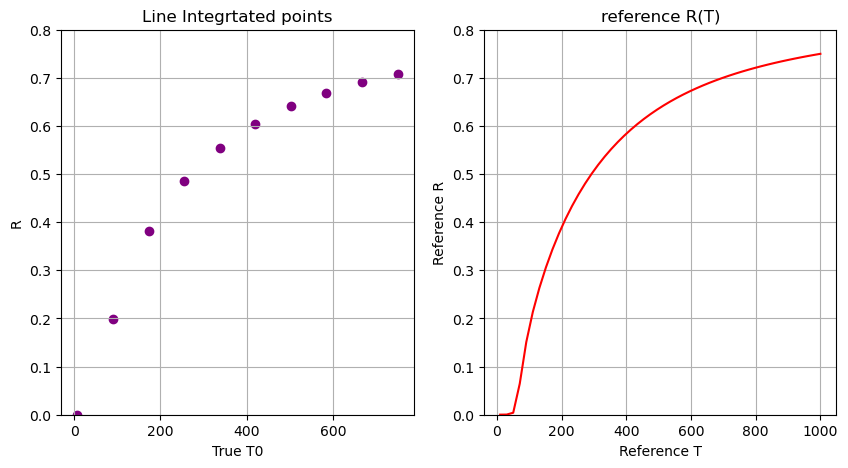

In [69]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].scatter(Tdav, N12arrayx/N6arrayx, color='purple')
axs[0].set_title('Line Integrtated points')
axs[0].set_xlabel('True T0')
axs[0].set_ylabel('R')
axs[0].set_ylim((0, 0.8))
axs[0].grid()

axs[1].plot(Tarray, N12array/N6array, color='red')
axs[1].set_title('reference R(T)')
axs[1].set_xlabel('Reference T')
axs[1].set_ylabel('Reference R')
axs[1].set_ylim((0, 0.8))
axs[1].grid()

Text(0, 0.5, 'R')

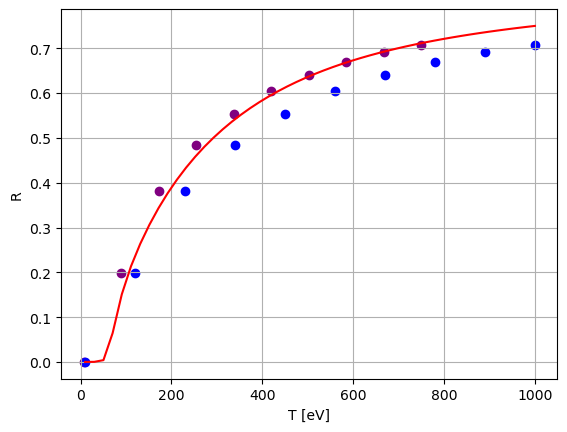

In [75]:
plt.scatter(Tdav, N12arrayx/N6arrayx, color='purple')
plt.scatter(Tarray2, N12arrayx/N6arrayx, color='blue')
plt.plot(Tarray, N12array/N6array, color='red')
plt.grid()
plt.xlabel('T [eV]')
plt.ylabel('R')

In [107]:
# problem 3
a = 1
n0 = 1e22
T0 = 12
def n3d(x, y, n0):
    r = np.sqrt(x**2 + y**2)
    if r <= a:
        return n0*(1 + r**2/a**2)
    else:
        return 0

def T3d(x, y, T0):
    r = np.sqrt(x**2 + y**2)
    if r <=a:
        return T0/(1 + r**2/a**2)
    else:
        return 0
    
xarray = np.linspace(-1.1*a, 1.1*a, 50)
yarray = np.linspace(-1.1*a, 1.1*a, 50)

X, Y = np.meshgrid(xarray, yarray)

n3dmat = np.zeros_like(X)
T3dmat = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(Y.shape[1]):
        x = X[i,j]
        y = Y[i,j]
        n3dmat[i,j] = n3d(x,y,n0)
        T3dmat[i,j] = T3d(x,y,T0)

print(X.shape)
print(n3dmat.shape)



(50, 50)
(50, 50)


(-1.1224489795918369,
 1.1224489795918369,
 -1.1224489795918369,
 1.1224489795918369)

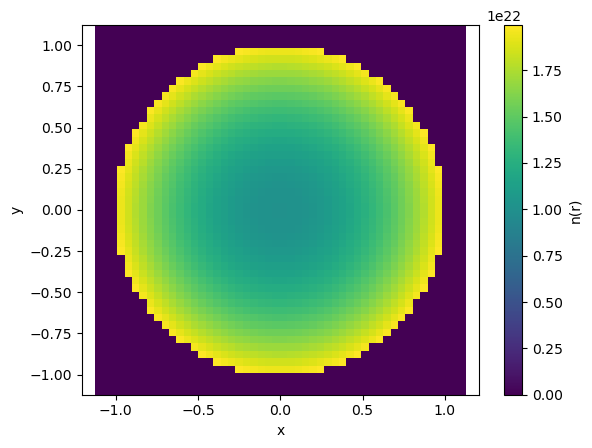

In [108]:
plt.pcolor(X, Y, n3dmat)
plt.colorbar(label='n(r)')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')

(-1.1224489795918369,
 1.1224489795918369,
 -1.1224489795918369,
 1.1224489795918369)

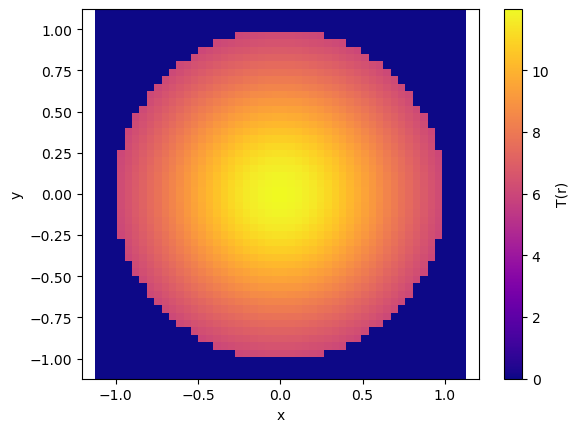

In [109]:
plt.pcolor(X, Y, T3dmat, cmap='plasma')
plt.colorbar(label='T(r)')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')


In [114]:
def get_j3d(x, y, E, n0, T0):
    n = n3d(x, y, n0)
    T = T3d(x, y, T0)
    if np.sqrt(x**2 + y**2) <= a:
        return n**2*T**(-.5)*np.exp(-E/T)
    else:
        return 0

def get_jcubed(xmat, ymat, Egrid, T0, n0):
    jcubed = np.zeros((xmat.shape[0], ymat.shape[1], Egrid.shape[0]))
    for ix in range(xmat.shape[0]):
        print(ix*100/xmat.shape[0], '% complete')
        for iy in range(ymat.shape[1]):
            for iE in range(Egrid.shape[0]):
                x = xmat[ix, iy]
                y = ymat[ix, iy]
                E = Egrid[iE]
                jcubed[ix, iy, iE] = get_j3d(x, y, E, n0, T0)
    return jcubed

jcubed_list = []
n0 = 1e22
xarray = np.linspace(-1.1*a, 1.1*a, 50)
yarray = np.linspace(-1.1*a, 1.1*a, 50)
X, Y = np.meshgrid(xarray, yarray)
for iT in range(Tarray2.shape[0]):
    T = Tarray2[iT]
    jcubed_list.append(get_jcubed(xmat=X, ymat=Y, Egrid=Egrid, T0=T, n0=n0))


0.0 % complete
2.0 % complete
4.0 % complete
6.0 % complete
8.0 % complete
10.0 % complete
12.0 % complete
14.0 % complete
16.0 % complete
18.0 % complete
20.0 % complete
22.0 % complete
24.0 % complete
26.0 % complete
28.0 % complete
30.0 % complete
32.0 % complete
34.0 % complete
36.0 % complete
38.0 % complete
40.0 % complete
42.0 % complete
44.0 % complete
46.0 % complete
48.0 % complete
50.0 % complete
52.0 % complete
54.0 % complete
56.0 % complete
58.0 % complete
60.0 % complete
62.0 % complete
64.0 % complete
66.0 % complete
68.0 % complete
70.0 % complete
72.0 % complete
74.0 % complete
76.0 % complete
78.0 % complete
80.0 % complete
82.0 % complete
84.0 % complete
86.0 % complete
88.0 % complete
90.0 % complete
92.0 % complete
94.0 % complete
96.0 % complete
98.0 % complete
0.0 % complete
2.0 % complete
4.0 % complete
6.0 % complete
8.0 % complete
10.0 % complete
12.0 % complete
14.0 % complete
16.0 % complete
18.0 % complete
20.0 % complete
22.0 % complete
24.0 % complete
26

In [115]:
print(len(jcubed_list))


10


In [116]:
print(jcubed_list)

[array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0

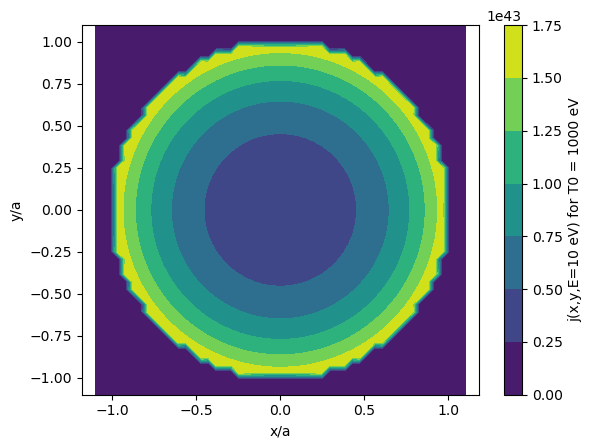

In [129]:
plt.contourf(X, Y, jcubed_list[-1][:,:,0])
plt.axis('equal')
plt.xlabel('x/a')
plt.ylabel('y/a')
plt.colorbar(label='j(x,y,E=10 eV) for T0 = 1000 eV')

In [130]:
I_yE_list = []

for iT in range(Tarray2.shape[0]):
    jcubed = jcubed_list[iT]
    IyE = np.trapz(jcubed, xarray, axis=0)
    I_yE_list.append(IyE)



In [131]:
print(I_yE_list[0].shape)
print(Egrid.shape)

(50, 1001)
(1001,)


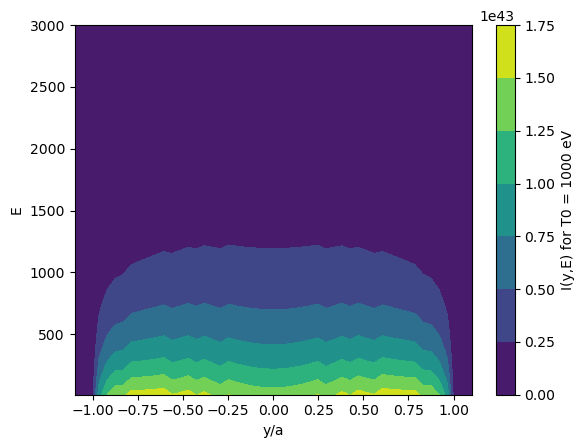

In [132]:
yy, EE = np.meshgrid(yarray, Egrid)
plt.contourf(yy, EE, I_yE_list[-1].T)
plt.xlabel('y/a')
plt.ylabel('E')
plt.colorbar(label='I(y,E) for T0 = 1000 eV')

In [135]:
N6list = []
N12list = []

for iT in range(Tarray2.shape[0]):
    I_yE = I_yE_list[iT]
    N6 = np.zeros_like(yarray)
    N12 = np.zeros_like(yarray)
    for iy in range(yarray.shape[0]):
        y_E = I_yE[iy, :]
        N6[iy] = np.trapz(y_E*Be6trans, Egrid)
        N12[iy] = np.trapz(y_E*Be12trans, Egrid)
    N6list.append(N6)
    N12list.append(N12)



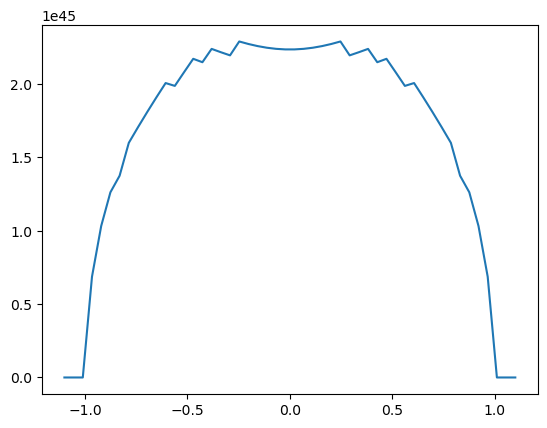

In [137]:
plt.plot(yarray, N6list[-1])

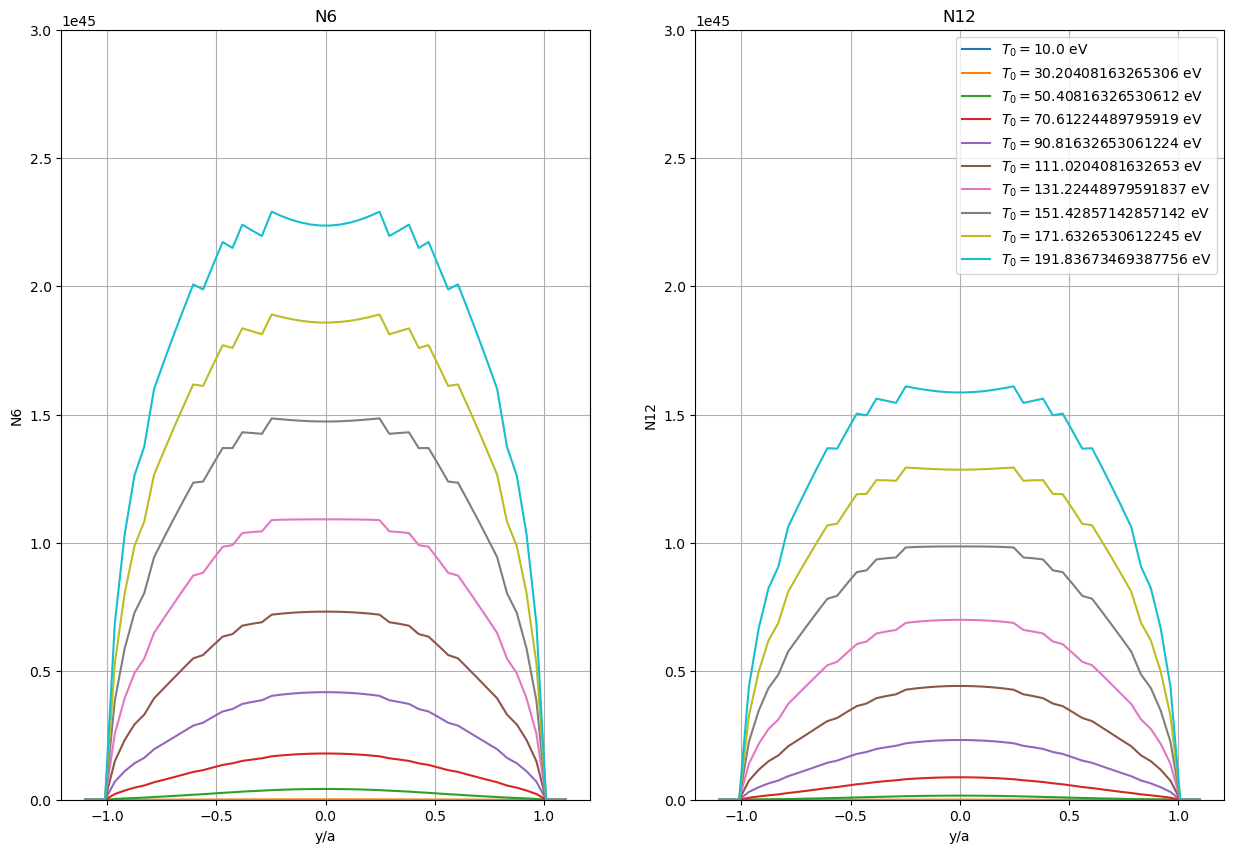

In [147]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
for i in range(Tarray2.shape[0]):
    label = r'$T_0 = $' + str(Tarray[i]) + ' eV'
    axs[0].plot(yarray, N6list[i], label=label)
axs[0].set_title('N6')
axs[0].set_xlabel('y/a')
axs[0].set_ylabel('N6')
axs[0].set_ylim((0, 3e45))
axs[0].grid()


for i in range(Tarray2.shape[0]):
    label = r'$T_0 = $' + str(Tarray[i]) + ' eV'
    axs[1].plot(yarray, N12list[i], label=label)
axs[1].set_title('N12')
axs[1].set_xlabel('y/a')
axs[1].set_ylabel('N12')
axs[1].set_ylim((0, 3e45))
axs[1].grid()
axs[1].legend()

In [153]:
dN6dy_list = []
dN12dy_list = []
for iT in range(Tarray2.shape[0]):
    dN6dy_list.append(np.gradient(N6list[iT], yarray))
    dN12dy_list.append(np.gradient(N12list[iT], yarray))



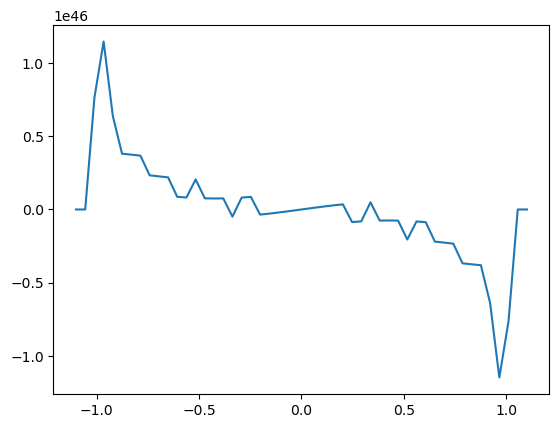

In [154]:
plt.plot(yarray, dN6dy_list[-1])

In [164]:
# inverse Abel inversion 

N6r_list = []
N12r_list = []
for iT in range(Tarray2.shape[0]):
    rarray = np.linspace(0, 1.1*a, 50)
    N6r = np.zeros_like(rarray)
    N12r = np.zeros_like(rarray)
    for ir in range(rarray.shape[0]):
        r = rarray[ir]
        idxl = np.where(np.abs(yarray - r) == np.min(np.abs(yarray-r)))[0][0]
        idxu = np.where(np.abs(yarray - a) == np.min(np.abs(yarray-a)))[0][0]
        # print(r, idxl, idxu, yarray[idxl], yarray[idxu])
        front = -1/np.pi
        dN6dy = dN6dy_list[iT][idxl:idxu]
        dN12dy = dN12dy_list[iT][idxl:idxu]
        integrand = 1/np.sqrt(yarray[idxl:idxu]**2 - r**2)
        N6r[ir] = np.trapz(front*dN6dy*integrand)
        N12r[ir] = np.trapz(front*dN12dy*integrand)

    N6r_list.append(N6r)
    N12r_list.append(N12r)



C:\Users\jacob\AppData\Local\Temp\ipykernel_29504\2887926856.py:17: RuntimeWarning: invalid value encountered in sqrt
  integrand = 1/np.sqrt(yarray[idxl:idxu]**2 - r**2)
C:\Users\jacob\AppData\Local\Temp\ipykernel_29504\2887926856.py:17: RuntimeWarning: divide by zero encountered in divide
  integrand = 1/np.sqrt(yarray[idxl:idxu]**2 - r**2)
